### Importing libraries:

In [96]:
import pickle
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as ss
from pandas.plotting import scatter_matrix
import seaborn as sns
import pandas.testing as pdt
import scipy.stats as ss
import numpy.testing as npt
import pandas.testing as pdt
import statsmodels.api as sm
from statsmodels.stats import outliers_influence

sns.set_style("darkgrid")

# <b>Title : Investigating factors determining property value in Mbombela </b>

### Compiled by:
1. Bongumusa Mavuso(1682836)
2. Siyabonga Hlomuka (1384685)
3. Thobelani Makeleni (1199116)

# <b>Executive Summary:</b>

The purpose of this notebook is to present a study that will investigate factors that influence the evaluation of the property value of the properties of the Mbombela Municipality.

The study will model the relationship between each of these different factors and the property value using the dataset from the property evaluation roll which was conducted in 2010 within the area of Mbombela by the Mbombela Municipality.

The main result of this study will be a linear model in this form - $y = \beta_o + \beta_1 * x_1 + \beta_2* x_2 + ...$ $ where, \ \   x_i  \ \ where \ i\ = \ {{0, 1, ... , n}} \ $  represents the $ x^{ith}$ feature which influence the market value (y) of the property and $ \ \beta_i \ \ where \ i \ =  \ {0, 1, 2, .., n } \ $ is the weight of the $\ x^{ith} \$ feature.In addition we will also make use graphical representation that will show the relationships between the distinct features which have a direct causal influence in determining the market value of the properties,  and the market value of the properties.

#### Limitations:

We did not get a similar dataset to this one, which was collected prior 2010 or after 2010, which we can use to compare this dataset to or use it to test our model (test our model on a dataset from a different time period). The dataset was not accompanied by a data description hence we have no rich knowledge about the true meaning of some of the features , how the dataset was collected and how the properties used on the dataset were selected. Furthermore, the dataset is incomplete, since some of the features contained null values for the majority of their values. The data was only collected from Mbombela Mpumalanga, making it difficult for our dataset to represent the entire population of South Africa.

# <b>Introduction:</b>

Every four years, the local municipalities in South Africa conduct a general evaluation roll that determines the municipal values of homes and the property rates that should be paid based on these values and ultimately, the price of the property. The property owners usually have objections to the property values determined by the municipality as these values are usually too low for a property value or too high for the prices that the owners must pay for using the municipality services. The property owners usually do not know how the municipality got to the property prices that come after the evaluation, as with the recent evaluation in where property owners experienced a hike in municipality bills. \[ [Private Property](https://www.privateproperty.co.za/advice/news/articles/property-valuations-shock-what-homeowners-can-do/6230)\]

In this project, we are investigating the factors that contribute to the property evalution prices using the dataset from Mbombela Municipality Evaluation Roll for 2010. This kind of analysis has not been done before. Useful sites to extend this introduction:
1. [Schindlers](https://www.schindlers.co.za/2017/howdovalrollswork/)

## Question:
 ### What factors dertermine the property value and to what extent do these factors contribute to the value of the property?
 
\*********
 
## Overview of methology:
A brief overview of the methodology is as follows:<br>
<br>
1) Read in data<br>
<br>
2) Data wrangling:<br>
&emsp;&emsp; Removing variables that are irrelavant to our question<br>
&emsp;&emsp; Removing Variables that are missing most of its values<br>
&emsp;&emsp; Recovering some variables values, null values, that can't be recovered<br>
&emsp;&emsp; Cleaning variables<br>
&emsp;&emsp; Changing Variable types<br>
<br>
3) Encode variables:<br>
&emsp;&emsp;        Encoding categorical variables
<br>
<br>
4) Exploratory Analyses:<br>
&emsp;&emsp;        Put Exploratory graphs<br>
&emsp;&emsp;        Calculate statistic figures:<br>
&emsp;&emsp;&emsp;&emsp;                eg. Mean, std, min, max and percentiles


## Section Contents overview:
1. [Data Description](#Data-Description)
2. [Data Wrangling](#Data-Wrangling)
3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)


# <b> Data Description: </b>

The dataset was obtained from [Open Africa:  Mbombela Municipality Property Valuation 2010 ](https://africaopendata.org/dataset/mbombela-municipality-property-valuation-2010) and downloaded on the 18 April 2021. The dataset contains over 57000 data points which have 49 features that describe some of the properties in Mbombela Municipality. 

#### Date collected:
The data was collected in Mbombela Municipal Council, in Mpumalanga, South Africa, in 2010. The last time the data modified was on December 21, 2017, 1:09 PM (UTC+02:00)
 
#### Dataset before cleaning:
The original dataset consists of 49 columns, 48 showing different factors contributing to the price of property in Mbombela. The description of these columns is given below:

- Township = The township in Mbombeni.
- Stand No = Stand number is used to identify the property
- Sect Title No = Section Title Number. Sectional Title, as a form of ownership (as per the Sectional Titles Act No.95 of 1986), emerged originally to permit parties to buy a piece or section of a larger property / building / development in a fashion where there ownership (or title) is protected (under Sectional Title law) and where there are clear rules and guidelines on how the overall property is managed, maintained and run. 
- StandDescrip = Stand Description.
- Owner Name = The owner of the property.
- Account No = Account Number. Account Number of the owner.
- Prop Category = Property Category
- TariffCode = Tariff Code.
- Physical Addr = Physical Address Showing the physical location of the property.
- Street No = Street Number. Identifying the street where the property is located
- Size = The size of the property measured in square meters
- Up-Level Size
- MarketValue = The price which the property is valued at. (Our Predictive Variable)
- Exemp Size
- Exemp Value
- Main Roll No = Main Roll Number. A Roll Number tells you everything you need to know about where a property is located. 
- Supp RollNo = Supplimentary roll number.Every property in every municipality should (hypothetically) be on a roll, but because properties are continuously coming into existence and ceasing to exist, new rolls are created (these are referred to as supplementary rolls) to include any properties that have not been previously recorded on another, prior, general roll.
- Owner Type = What type of owner is it (Private, municiplaity, Departmental and General)
- Valuation Date = When was the property evaluated in order to put a market value on it.
- Effect Date = The Effective Date for each Property Use Detail is the date that it was first valid for the property.
- Up-LevelInd
- Zone Code = Land zoning is how local governments, such as city councils, restrict the physical development and use of specific parcels of land. 
- Zone Descrip = Zone Description, Expanding on the codes and what it means. The Code descriptions are: 'BUSINESS 2', 'BUSINESS 1', 'PUBLIC GARAGE', 'RESIDENTIAL 4','SPECIAL', 'GOVERNMENT', 'MUNICIPAL', 'EXISTING PUBLIC ROADS', 'RESIDENTIAL 1', 'PUBLIC OPEN SPACE', 'BUSINESS 4', 'RESIDENTIAL 3', 'EDUCATIONAL', 'RESIDENTIAL 2', 'PRIVATE OPEN SPACE', 'INSTITUTIONAL', 'INDUSTRIAL 1', 'CHURCHES', 'INDUSTRIAL 3', 'INDUSTRIAL 2', 'TRANSNET', 'AGRICULTURE', 'BUSINESS 3', 'PARKING', 'CEMETRY', 'RECREATION', 'RAILWAY LINE(TRANSNET)', 'PRIVATE ROAD', 'RESIDENTIAL 5', 'GOVERNMENT & TELKOM', 'COMMERCIAL', 'KANYAMAZANE'
- Usage Code = Usage code is a code that details how the property will be used.
- UsageDescrip = Usage Description, Expanding on the codes and what it means. The Code descriptions are: 'BUSINESS 2', 'BUSINESS 1', 'PUBLIC GARAGE', 'RESIDENTIAL 4', 'SPECIAL', 'GOVERNMENT', 'MUNICIPAL', 'EXISTING PUBLIC ROADS', 'RESIDENTIAL 1', 'PUBLIC OPEN SPACE', 'BUSINESS 4', 'RESIDENTIAL 3', 'EDUCATIONAL', 'RESIDENTIAL BUSINESS', 'RESIDENTIAL 2', 'PRIVATE OPEN SPACE', 'DWELLINGS', 'INSTITUTIONAL', 'INDUSTRIAL 1', 'VACANT LAND SR', 'CHURCHES', 'INDUSTRIAL 3', 'PARKING', 'BED & BREAKFAST', 'INDUSTRIAL 2', 'TRANSNET', 'AGRICULTURE', 'BUSINESS 3', 'CEMETRY', 'RESIDENTIAL GUEST HOUSE', 'RESERVOIR', 'BUSINESS PREMISES', 'ROAD', 'RAILWAY LINE(TRANSNET)', 'AGRICULTURAL', 'PROPOSED NEW ROAD', 'RESIDENTIAL 5', 'VACANT LAND SINGLE RESIDENTIAL', 'POST OFFICE', 'COUNCIL VACANT RES 1 STANDS', 'FARM', 'SHOP', 'GOVERNMENT AND TELKOM', 'FACTORY', 'OFFICE', 'KANYAMASANE', 'SUBSTATION', 'CHURCH', 'VACANT LAND PLACES OF WORSHIP', 'CHRECHE', 'SCHOOL', 'PETROL FILLING STATION', 'CHICKEN HATCHERY', 'COMMUNITY CENTRE', 'ST DWELLING', 'ST RESIDENTIAL'
- Empty Stand Ind = Empty stand index that determine in the stand is empty or not.
- Valuation Type = The type of valuation method they used to value the property
- SGNumber
- Ward
- Cycle
- Meter Book
- Status = Property status refers to the situation of a property that was for sale, or is currently for sale.
- Val Cnt
- Postal Addr1 
- Postal Addr2
- Postal Addr3
- Postal Addr4
- Postal Addr5
- Postal Code
- BC Create Date
- BC Orig Date
- BC Altern Date
- BC Value
- BC Tariff
- Deed Date
- Deed No = Deed Number.
- Register Date = Date which the property was registered
- Register No = Property Registration Number. means the number issued by the City identifying the Application
- Capture Date

#### Aspects of Data Quality:
- The data was retrieved from openAFRICA , openAFRICA is not a government portal. Instead, it’s a grassroots initiative, maintained by Code for Africa, as a public service.OpenAFRICA has additional support from Amazon Web Services (AWS) and the World Bank, both well known and accredited organisation thus making our source openAFRICA an accredible source.

- The data collection was done in 2010 and the evaluations of Market Value where done around the same time interval 2008 to 2010 making our Market values comparison fair because the amounts where not effected by other time factors like inflation. 

- The data was collected from the same region(Mbombeni)

- In terms of completness of data, we have some missing values from some cloumns, most notably columns BC Tariff, BC Value and SGNumber having no values at all. Columns Sect Title No, Empty Stand Ind, Postal Addr3, Postal Addr4, Postal Addr5, Deed No and StandDescrip have alot of missing values as well. The rest of the columns are mostly filled with a minimal of missing values.

- The columns are consistent in terms of the data type of each column.
- In terms of Unifromaty most of the columns have a consistent use of units and scales except for the column'Owner Type' as this has some numeric values which are unexplained.

#### Ability to answer question:
Considering our Question 'What factors dertermine the property value and to what extent do these factors contribute to the value of the property?' our dataset has adequate variables like size of property, owners of property etc, to tackle this question. At high sight after close data analyse, it is clear to see that our varibles might not be the best individually to tackle our question as no varible individually has a strong relationship with our predictive variable (Market value).

<h3>Reading in data:</h3>

In [10]:
data = pd.read_excel('valuation-2010.xls')

### Validations:

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57252 entries, 0 to 57251
Data columns (total 49 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [12]:
data.describe()

,Account No,Size,Up-Level Size,MarketValue,Exemp Size,Exemp Value,Main Roll No,Supp RollNo,Valuation Date,Effect Date,...,Val Cnt,Postal Code,BC Create Date,BC Orig Date,BC Altern Date,BC Value,BC Tariff,Deed Date,Register Date,Capture Date
count,5.723900e+04,5.724600e+04,57246.0,5.724600e+04,57246.0,57246.0,57246.0,57246.000000,5.724600e+04,5.724600e+04,...,57246.000000,57227.000000,57227.0,57227.0,57227.0,0.0,0.0,5.722700e+04,5.722700e+04,5.722700e+04
mean,2.632920e+06,4.980989e+04,0.0,6.644221e+05,0.0,0.0,2.0,1.442913,2.009117e+07,2.009117e+07,...,1.000943,1900.546980,0.0,0.0,0.0,NaN,NaN,2.202494e+06,9.767406e+06,2.877971e+07
std,9.302737e+05,8.205704e+05,0.0,3.786126e+06,0.0,0.0,0.0,1.055363,2.034716e+03,2.034717e+03,...,0.040940,2221.613457,0.0,0.0,0.0,NaN,NaN,6.263835e+06,1.001051e+07,4.032805e+07
min,1.000855e+06,0.000000e+00,0.0,0.000000e+00,0.0,0.0,2.0,1.000000,2.009070e+07,2.009070e+07,...,1.000000,0.000000,0.0,0.0,0.0,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.114612e+06,3.520000e+02,0.0,5.600000e+04,0.0,0.0,2.0,1.000000,2.009070e+07,2.009070e+07,...,1.000000,1200.000000,0.0,0.0,0.0,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.506226e+06,5.420000e+02,0.0,2.400000e+05,0.0,0.0,2.0,1.000000,2.009070e+07,2.009070e+07,...,1.000000,1200.000000,0.0,0.0,0.0,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.062104e+06,1.108000e+03,0.0,7.000000e+05,0.0,0.0,2.0,1.000000,2.009070e+07,2.009070e+07,...,1.000000,1240.000000,0.0,0.0,0.0,NaN,NaN,0.000000e+00,2.004071e+07,2.009092e+07
max,1.564422e+07,9.327444e+07,0.0,6.600000e+08,0.0,0.0,2.0,6.000000,2.010012e+07,2.010012e+07,...,4.000000,9999.000000,0.0,0.0,0.0,NaN,NaN,2.009082e+07,2.202093e+07,1.000000e+08


In [13]:
data.head()

,Township,Stand No,Sect Title No,StandDescrip,Owner Name,Account No,Prop Category,TariffCode,Physical Addr,Street No,...,BC Create Date,BC Orig Date,BC Altern Date,BC Value,BC Tariff,Deed Date,Deed No,Register Date,Register No,Capture Date
0,NELSPRUIT TOWN,000000000000010000100000000,NaN,GED 1 ERF 1,NELSPRUIT HARDWARE,2218141.0,BUS,VABUS,PAUL KRUGER STREET,1,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,19810925.0,T46343/81,99999999.0
1,NELSPRUIT TOWN,00000000000001000RE00000000,NaN,RESTANT VAN ERF 1,MINTY IE & SONS PTY LTD,2218119.0,BUS,VABUS,ANDERSON STREET,36,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,19810925.0,T46344/81,99999999.0
2,NELSPRUIT TOWN,000000000000020000000000000,NaN,ERF 2,MINTYS UNIVERSAL STORES LTD,2218130.0,BUS,VABUS,ANDREW STREET,33,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,T96299/200,0.0
3,NELSPRUIT TOWN,000000000000030000000000000,NaN,ERF 3,LOWMIN PROPERTIES (PTY) LTD,2217568.0,BUS,VABUS,ANDERSON STREET,32,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,T96299/200,0.0
4,NELSPRUIT TOWN,000000000000040000000000000,NaN,ERF 4,NELMIN ERF 4 PROPERTIES (PTY) LTD,2040436.0,BUS,VABUS,ANDERSON STREET,30,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,20020814.0,T96299/200,20021029.0


From the above summary it is clear that each column is a variable and each row represents a new property record that has values from each column. The raw data has some missing values indicated by NaN. Each Column is either an object or float, float is all the numeric columns, including the date, and the rest are threated as object. The date will late be changed to the correct type(datetime)

# Data Wrangling:

<blockqoute>
In this next cell we drop several columns of the dataset either because we think they were irrelevent in determining the value of the property or the data had a lot of missing values or the information contained in the column was redundant as it was contained in another column.
</blockqoute>

In [14]:
#Columns to be removed
#Stand No, Sect Tittle, Account Number, TariffCode, Street No, Up-Level Size,
#Exemp Size, Main Roll No, Owner Type, Valuation Date, Up-levelInd, Usage Description
#Zone Description, SG Number, Status, Postal Address(1,2, 3, 4, 5), All columns with 'BC', Postal Code,
#Deed No, Register No, Valuation Date, Capture Date 
# Stand No, Sect Tittle, Account Number, TarrifCode(Because it is dependent ), Street No,Up-Level Size,  Exemp Size,Exemp Value,  
#Main Roll No, Owner Type(dependent on), Valuation date, Up-LevelInd, usage description, Zone Description, SGNumber, 
# Status, (Postal Adrress1, 2, 3, 4, 5), BC Date, Postal Code, Deed No,(All BC Values), Register No.
#Valuation Date(date time type), Capture Date
# Usage Code: Discard later if needed
# What does Empty Stand Ind - indicate?(remove if possible)
# Investigate the meaning of Valuation Type Values
#More info on: Meter Book
# Verify if Postal Code matches with the township
# 
data_new = data.drop(columns = ['Stand No', 'StandDescrip','Sect Title No', 'Account No', 'TariffCode',
       'Street No', 'Up-Level Size','Exemp Size',
       'Exemp Value', 'Main Roll No', 'Owner Type',
       'Valuation Date', 'Up-LevelInd','BC Create Date',
       'BC Orig Date', 'BC Altern Date', 'BC Value','BC Tariff',
       'Zone Descrip', 'UsageDescrip','SGNumber','Status',
       'Postal Addr1', 'Postal Addr2', 'Postal Addr3',
       'Postal Addr4', 'Postal Addr5', 'Postal Code',
       'Deed Date', 'Deed No', 'Register Date', 'Register No'])
data_new = data_new.drop(columns = [data_new.columns[-1]])
##Number of columns in the oriiginal data set
num_cols_orig = len(data.columns)
new_num_cols = len(data_new.columns)
left_cols= num_cols_orig - new_num_cols
#Capute date is not properly named, so we must remove it using the indexs
print('After cleaning our data, we were able to remove', str(left_cols) + " features", 'and we were left with', str(new_num_cols) + " features")
# print('\nWe then set our MarketValue as our independed variable, the one we want to predict and moved it to the last columns for easy accessing')
# temp_col = data_new['MarketValue']
# data_new = data_new.drop(columns = ['MarketValue'])
# data_new['MarketValue'] = temp_col
print('\n''This is our dataset after perfoming the above operations:')
data_new.head(3)

After cleaning our data, we were able to remove 33 features and we were left with 16 features

This is our dataset after perfoming the above operations:


,Township,Owner Name,Prop Category,Physical Addr,Size,MarketValue,Supp RollNo,Effect Date,Zone Code,Usage Code,Empty Stand Ind,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
0,NELSPRUIT TOWN,NELSPRUIT HARDWARE,BUS,PAUL KRUGER STREET,862.0,2900000.0,4.0,20090805.0,BUS2,BUS2,N,VI,14.0,3.0,MB0201,1.0
1,NELSPRUIT TOWN,MINTY IE & SONS PTY LTD,BUS,ANDERSON STREET,625.0,1700000.0,1.0,20090701.0,BUS2,BUS2,NaN,VG,14.0,3.0,MB0005,1.0
2,NELSPRUIT TOWN,MINTYS UNIVERSAL STORES LTD,BUS,ANDREW STREET,1487.0,6200000.0,4.0,20090805.0,BUS2,BUS2,NaN,VI,14.0,3.0,MB0201,1.0


Now that we have removed all the dirty columns by dropping the them, we continued to clean the dataset that was left by cleaning the Nan values by either trying to recover lost data using the current existing data or removing the Nan data if it was unrecoverable.

## Wrangling from column 0 to column 5:

We clean the remain dataset in portion to avoid the errors and make it easy to manage and trace mistakes in the data. Beginning with columns from 1 to column 5

In [15]:
df = pd.DataFrame()
df = data_new.copy()
df.head()

,Township,Owner Name,Prop Category,Physical Addr,Size,MarketValue,Supp RollNo,Effect Date,Zone Code,Usage Code,Empty Stand Ind,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
0,NELSPRUIT TOWN,NELSPRUIT HARDWARE,BUS,PAUL KRUGER STREET,862.0,2900000.0,4.0,20090805.0,BUS2,BUS2,N,VI,14.0,3.0,MB0201,1.0
1,NELSPRUIT TOWN,MINTY IE & SONS PTY LTD,BUS,ANDERSON STREET,625.0,1700000.0,1.0,20090701.0,BUS2,BUS2,NaN,VG,14.0,3.0,MB0005,1.0
2,NELSPRUIT TOWN,MINTYS UNIVERSAL STORES LTD,BUS,ANDREW STREET,1487.0,6200000.0,4.0,20090805.0,BUS2,BUS2,NaN,VI,14.0,3.0,MB0201,1.0
3,NELSPRUIT TOWN,LOWMIN PROPERTIES (PTY) LTD,BUS,ANDERSON STREET,1487.0,7300000.0,4.0,20090805.0,BUS2,BUS2,NaN,VI,14.0,3.0,MB0005,1.0
4,NELSPRUIT TOWN,NELMIN ERF 4 PROPERTIES (PTY) LTD,BUS,ANDERSON STREET,1487.0,4500000.0,6.0,20100125.0,BUS2,BUS2,N,VI,14.0,3.0,MB0005,1.0


In [16]:
print('Showing the null values found in the above dataframe for each columns:\n')
print('Township contains ', df['Township'].isnull().sum(), 'null values')          #printing null values of Township
print('Owner Name column contains', df['Owner Name'].isnull().sum(), 'null values')#printing null values of Owner Name
print('Prop Category contains', df['Prop Category'].isnull().sum(), 'null values') #printing null values of Prop Category
print('Physical Addr contains', df['Physical Addr'].isnull().sum(), 'null values') #printing null values of Physical Addr
print('Size column contains', df['Size'].isnull().sum(), 'null values')            #printing null values of Size
print('MarketValue contains', df['MarketValue'].isnull().sum(), 'null values')     #printing null values of MarketValue

Showing the null values found in the above dataframe for each columns:

Township contains  0 null values
Owner Name column contains 13 null values
Prop Category contains 6 null values
Physical Addr contains 285 null values
Size column contains 6 null values
MarketValue contains 6 null values


We will start with the columns that contains least number of null/Nan. 

We start by the Prop Category column, and encode the different attributes using numbers, the we encoded the Nan in the Owners column with "Other" to represent the owners we do not have details of.

We filled the Nan values in the columns 'Owner Name' and 'Physical Addr' with the word 'Other' and 'Unknown' respectively as they was no method to recover them.

In [17]:
#encode prop category
#1 BUS and #2 RES #3 GOV #4 MUN #5 POW #6 OTH #7 PSI #8 AG #9 RUR
df['Prop Category'] = np.where(df['Prop Category'] == 'BUS', 1 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'RES', 2 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'GOV', 3 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'MUN', 4 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'POW', 5 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'OTH', 6 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'PSI', 7 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'AG',  8 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'RUR', 9 ,df['Prop Category'])

In [18]:
#encode missing owners name with 'other'
df['Owner Name'] = df['Owner Name'].fillna('Other')
df['Owner Name'].isnull().sum()

0

In [19]:
#encode missing values for physical address
df['Physical Addr'] = df['Physical Addr'].fillna('Unknown')
df['Physical Addr'].isnull().sum()

0

In [20]:
physical_addr = df['Physical Addr'].tolist()
streets  = []
street_num  = 1
for i, street in enumerate(physical_addr):
    if street not in streets:
        streets.append(street)
        physical_addr[i] = streets.index(street) + 1
    else:
        physical_addr[i] = streets.index(street) + 1
df['Physical Addr'] = physical_addr

In [21]:
df['Prop Category']

0        1
1        1
2        1
3        1
4        1
        ..
57247    2
57248    2
57249    2
57250    2
57251    2
Name: Prop Category, Length: 57252, dtype: object

In [22]:
print('This is the dataframe after cleaning the columns 0-5:')
##Store this new cleaned to df_clean
df_clean = df.copy()
df.head()

This is the dataframe after cleaning the columns 0-5:


,Township,Owner Name,Prop Category,Physical Addr,Size,MarketValue,Supp RollNo,Effect Date,Zone Code,Usage Code,Empty Stand Ind,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
0,NELSPRUIT TOWN,NELSPRUIT HARDWARE,1,1,862.0,2900000.0,4.0,20090805.0,BUS2,BUS2,N,VI,14.0,3.0,MB0201,1.0
1,NELSPRUIT TOWN,MINTY IE & SONS PTY LTD,1,2,625.0,1700000.0,1.0,20090701.0,BUS2,BUS2,NaN,VG,14.0,3.0,MB0005,1.0
2,NELSPRUIT TOWN,MINTYS UNIVERSAL STORES LTD,1,3,1487.0,6200000.0,4.0,20090805.0,BUS2,BUS2,NaN,VI,14.0,3.0,MB0201,1.0
3,NELSPRUIT TOWN,LOWMIN PROPERTIES (PTY) LTD,1,2,1487.0,7300000.0,4.0,20090805.0,BUS2,BUS2,NaN,VI,14.0,3.0,MB0005,1.0
4,NELSPRUIT TOWN,NELMIN ERF 4 PROPERTIES (PTY) LTD,1,2,1487.0,4500000.0,6.0,20100125.0,BUS2,BUS2,N,VI,14.0,3.0,MB0005,1.0


## Data Wrangling on column 6-12:

In [23]:
#Data wrangling of dataset from Column 7 to Coulumn 13
data_section = df_clean.iloc[:,6:12]
data_section

,Supp RollNo,Effect Date,Zone Code,Usage Code,Empty Stand Ind,Valuation Type
0,4.0,20090805.0,BUS2,BUS2,N,VI
1,1.0,20090701.0,BUS2,BUS2,NaN,VG
2,4.0,20090805.0,BUS2,BUS2,NaN,VI
3,4.0,20090805.0,BUS2,BUS2,NaN,VI
4,6.0,20100125.0,BUS2,BUS2,N,VI
...,...,...,...,...,...,...
57247,1.0,20090701.0,RES2,RES2,N,VG
57248,1.0,20090701.0,RES2,RES2,N,VG
57249,1.0,20090701.0,RES2,RES2,N,VG
57250,2.0,20090702.0,RES1,RES1,N,VI


Noting that there is only N and Nan values in the 'Empty Stand Ind' column, we could have decided that the Nan represented YES but that assumption was far fetched as we cannot conclude that the stand is empty or not give as there may be other factors affecting this variable, as a result we dropped this column and have the result shown below.


In [24]:
#There is only N and null values in 'Empty Stand Ind'. The question is 'is null equal to yes?', this assumption is far fetched thus might be incorrect, based on that we take out this column

##For debugging purposes
try:
    df_clean = df_clean.drop(columns = 'Empty Stand Ind')
except:
    print('The column Epmty Stand Ind has been removed already')
data_section = df_clean.iloc[:,6:12]
data_section

,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward
0,4.0,20090805.0,BUS2,BUS2,VI,14.0
1,1.0,20090701.0,BUS2,BUS2,VG,14.0
2,4.0,20090805.0,BUS2,BUS2,VI,14.0
3,4.0,20090805.0,BUS2,BUS2,VI,14.0
4,6.0,20100125.0,BUS2,BUS2,VI,14.0
...,...,...,...,...,...,...
57247,1.0,20090701.0,RES2,RES2,VG,30.0
57248,1.0,20090701.0,RES2,RES2,VG,30.0
57249,1.0,20090701.0,RES2,RES2,VG,30.0
57250,2.0,20090702.0,RES1,RES1,VI,30.0


In [25]:
print('This is the number of columns with missing values:', end = " ")
#Checking columns with null values
ncols_missing = data_section.isnull().any(axis=0).sum()
print(ncols_missing)
print('This is the number of rows with missing values:', end = " ")
#Checking rows with null values
nrows_missing = data_section.isnull().any(axis=1).sum()
print(nrows_missing)

This is the number of columns with missing values: 6
This is the number of rows with missing values: 6


In [26]:
#All 6 columns have missing values
#6 rows have missing values

#For seing which rows index are null in respect to each column.
print(np.where(data_section['Supp RollNo'].isnull() == True)[0])
print("rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Supp RollNo")
print(np.where(data_section['Effect Date'].isnull() == True)[0])
print("rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Effect Date")
print(np.where(data_section['Zone Code'].isnull() == True)[0])
print("rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Zone Code")
print(np.where(data_section['Usage Code'].isnull() == True)[0])
print("rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Usage Code")
print(np.where(data_section['Valuation Type'].isnull() == True)[0])
print("rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Valuation Type")
print(np.where(data_section['Ward'].isnull() == True)[0])
print("rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Ward")

[30400 40754 40767 40800 40815 40834]
rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Supp RollNo
[30400 40754 40767 40800 40815 40834]
rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Effect Date
[30400 40754 40767 40800 40815 40834]
rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Zone Code
[30400 40754 40767 40800 40815 40834]
rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Usage Code
[30400 40754 40767 40800 40815 40834]
rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Valuation Type
[30400 40754 40767 40800 40815 40834]
rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Ward


In [27]:
print(df_clean.loc[[30400, 40754, 40767, 40800, 40815, 40834]])
#All the rows with missing values are removed
df_clean = df_clean.drop([30400, 40754, 40767, 40800, 40815, 40834]);

            Township                   Owner Name Prop Category  \
30400    ROCKY DRIFT   TEN ROCKY DRIFT PTY LTD              NaN   
40754  KANYAMAZANE-A      SM NGOMANE                        NaN   
40767  KANYAMAZANE-A      HM NGOMANE                        NaN   
40800  KANYAMAZANE-A       F NGWAMBA                        NaN   
40815  KANYAMAZANE-A  M & NR THELA/NKOSI                    NaN   
40834  KANYAMAZANE-A      MS NHLAPO                         NaN   

       Physical Addr  Size  MarketValue  Supp RollNo  Effect Date Zone Code  \
30400            557   NaN          NaN          NaN          NaN       NaN   
40754            557   NaN          NaN          NaN          NaN       NaN   
40767            557   NaN          NaN          NaN          NaN       NaN   
40800            557   NaN          NaN          NaN          NaN       NaN   
40815            557   NaN          NaN          NaN          NaN       NaN   
40834            557   NaN          NaN          NaN    

In [28]:
print('This is the number of columns with missing values:', end = " ")
data_section = df_clean.iloc[:,7:12]
#Checking columns with null values
ncols_missing = data_section.isnull().any(axis=0).sum()
print(ncols_missing)
print('This is the number of rows with the missing values:', end = " ")
#Checking rows with null values
nrows_missing = data_section.isnull().any(axis=1).sum()
print(nrows_missing)

This is the number of columns with missing values: 0
This is the number of rows with the missing values: 0


In [29]:
#Making my dictionaries
dic = pd.Series(data_section['Zone Code'].unique())
dic.index = dic.index + 1
dic = pd.Series(dic.index.values, index = dic)

dic2 = pd.Series(data_section['Usage Code'].unique())
dic2.index = dic2.index + 1
dic2 = pd.Series(dic2.index.values, index = dic2)

dic3 = pd.Series(data_section['Valuation Type'].unique())
dic3.index = dic3.index + 1
dic3 = pd.Series(dic3.index.values, index = dic3)

In [30]:
#Encoding based on the dictionaries
lookup_table = dict(dic)

def lookup_customer(val):
    return lookup_table.get(val, np.nan)


data_section['Zone Code'] = data_section['Zone Code'].apply(lambda x: lookup_customer(x));

lookup_table = dict(dic2)
data_section['Usage Code'] = data_section['Usage Code'].apply(lambda x: lookup_customer(x));

lookup_table = dict(dic3)
data_section['Valuation Type'] = data_section['Valuation Type'].apply(lambda x: lookup_customer(x));

data_section
#df_new.head(20)

,Effect Date,Zone Code,Usage Code,Valuation Type,Ward
0,20090805.0,1,1,1,14.0
1,20090701.0,1,1,2,14.0
2,20090805.0,1,1,1,14.0
3,20090805.0,1,1,1,14.0
4,20100125.0,1,1,1,14.0
...,...,...,...,...,...
57247,20090701.0,14,15,2,30.0
57248,20090701.0,14,15,2,30.0
57249,20090701.0,14,15,2,30.0
57250,20090702.0,9,9,1,30.0


In [31]:
###Supp RollNo is Supplimentary roll number
##Every property in every municipality should (hypothetically) be on a roll, but because properties are continuously coming into existence and ceasing to exist, new rolls are created (these are referred to as supplementary rolls) to include any properties that have not been previously recorded on another, prior, general roll.
data_section.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57246 entries, 0 to 57251
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Effect Date     57246 non-null  float64
 1   Zone Code       57246 non-null  int64  
 2   Usage Code      57246 non-null  int64  
 3   Valuation Type  57246 non-null  int64  
 4   Ward            57246 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 2.6 MB


In [32]:
#convert column Effect date to date time
data_section['Effect Date'] = pd.to_datetime(data_section['Effect Date'], format='%Y%m%d') 
data_section

,Effect Date,Zone Code,Usage Code,Valuation Type,Ward
0,2009-08-05,1,1,1,14.0
1,2009-07-01,1,1,2,14.0
2,2009-08-05,1,1,1,14.0
3,2009-08-05,1,1,1,14.0
4,2010-01-25,1,1,1,14.0
...,...,...,...,...,...
57247,2009-07-01,14,15,2,30.0
57248,2009-07-01,14,15,2,30.0
57249,2009-07-01,14,15,2,30.0
57250,2009-07-02,9,9,1,30.0


In [33]:
print('The final cleaned dataframe')
df_clean.iloc[:,7:12] = data_section
df_clean

The final cleaned dataframe


,Township,Owner Name,Prop Category,Physical Addr,Size,MarketValue,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
0,NELSPRUIT TOWN,NELSPRUIT HARDWARE,1,1,862.0,2900000.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0201,1.0
1,NELSPRUIT TOWN,MINTY IE & SONS PTY LTD,1,2,625.0,1700000.0,1.0,2009-07-01,1,1,2,14.0,3.0,MB0005,1.0
2,NELSPRUIT TOWN,MINTYS UNIVERSAL STORES LTD,1,3,1487.0,6200000.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0201,1.0
3,NELSPRUIT TOWN,LOWMIN PROPERTIES (PTY) LTD,1,2,1487.0,7300000.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0005,1.0
4,NELSPRUIT TOWN,NELMIN ERF 4 PROPERTIES (PTY) LTD,1,2,1487.0,4500000.0,6.0,2010-01-25,1,1,1,14.0,3.0,MB0005,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57247,WHITERIVER ACRES,INGWE TRUST,2,740,91.0,475000.0,1.0,2009-07-01,14,15,2,30.0,40.0,MB4207,1.0
57248,WHITERIVER ACRES,S EIGENHUIS,2,740,91.0,475000.0,1.0,2009-07-01,14,15,2,30.0,40.0,MB4207,1.0
57249,WHITERIVER ACRES,JS STANDER,2,740,91.0,475000.0,1.0,2009-07-01,14,15,2,30.0,40.0,MB4207,1.0
57250,WILLIAM LYNNSTRAAT 51,JS STANDER,2,738,105.0,459000.0,2.0,2009-07-02,9,9,1,30.0,40.0,MB4221,1.0


In [34]:
##Cleaning the meter book column
#Getting the unique element

#Removing the rows where meter book is Nan
df_clean = df_clean[df_clean['Meter Book'].notna()]

meter_list = list(set(df_clean['Meter Book']))

In [35]:

meter_dic = {}
for i in meter_list:
    if type(i) is not int:
            meter_dic[i] = i

In [36]:
#The format of the meter book is in a certain way. As it can be seen in the dictionary of meter book, we will remove all
#The variables that do not meet this criteria. The we will encode the numbers meter numbers based on the available meter number
meter_dic

{'MB4203': 'MB4203',
 'MB0229': 'MB0229',
 'MB0002': 'MB0002',
 'MB0203': 'MB0203',
 'MB0227': 'MB0227',
 'MB0206': 'MB0206',
 'MB0202': 'MB0202',
 'MB0233': 'MB0233',
 'MB4058': 'MB4058',
 'MB4009': 'MB4009',
 'MB4159': 'MB4159',
 'MB0238': 'MB0238',
 'MB4604': 'MB4604',
 'MB4215': 'MB4215',
 'MB0214': 'MB0214',
 'MB4228': 'MB4228',
 'MB4200': 'MB4200',
 'MB0232': 'MB0232',
 'MB4240': 'MB4240',
 'MB4201': 'MB4201',
 'MB4602': 'MB4602',
 'MB0004': 'MB0004',
 'MB4608': 'MB4608',
 'MB5504': 'MB5504',
 'MB5507': 'MB5507',
 'DUMMY': 'DUMMY',
 'MB0224': 'MB0224',
 'MB7001': 'MB7001',
 'MB4221': 'MB4221',
 'DAANT': 'DAANT',
 'MSOGW': 'MSOGW',
 'MB0240': 'MB0240',
 'MB6020': 'MB6020',
 'MB4205': 'MB4205',
 'MB0228': 'MB0228',
 'MB4610': 'MB4610',
 'MB5500': 'MB5500',
 'MB4600': 'MB4600',
 'MB5512': 'MB5512',
 'MB5506': 'MB5506',
 'MB0200': 'MB0200',
 'MB4609': 'MB4609',
 'MB6025': 'MB6025',
 'MB0212': 'MB0212',
 'MB0237': 'MB0237',
 'MB9994': 'MB9994',
 'MB4214': 'MB4214',
 'MB0241': 'MB0241'

In [37]:
#Checks if the key is in the dictionary
def check_key(dic, key):
    if key in dic.keys():
        return True
    return False

#Used to discard all the meters that do not have values in them
def check_num(meter):
    return any(char.isdigit() for char in meter)

def cleanup_meter(meter):
    meter = str(meter)
    if check_num(meter) is False:
        return float('Nan')
    if check_key(meter_dic, meter):
        return meter
    #if it is not there we will encode it, else it is not available
    if check_num(meter):
#        meter = int(meter)
        l =4 - len(str(meter))  #Getting the number of values to add after the
        s = 'MB' + meter.zfill(l)
        return s

In [38]:
##Apply the cleanup function to the meter book column
df_clean['Meter Book'] = df_clean['Meter Book'].apply(cleanup_meter)
##Remove the Nan rows as they are the uncleanable data points
df_clean = df_clean[df_clean['Meter Book'].notna()]

In [39]:
##Updated clean dataframe
df_clean.head(5)

,Township,Owner Name,Prop Category,Physical Addr,Size,MarketValue,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
0,NELSPRUIT TOWN,NELSPRUIT HARDWARE,1,1,862.0,2900000.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0201,1.0
1,NELSPRUIT TOWN,MINTY IE & SONS PTY LTD,1,2,625.0,1700000.0,1.0,2009-07-01,1,1,2,14.0,3.0,MB0005,1.0
2,NELSPRUIT TOWN,MINTYS UNIVERSAL STORES LTD,1,3,1487.0,6200000.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0201,1.0
3,NELSPRUIT TOWN,LOWMIN PROPERTIES (PTY) LTD,1,2,1487.0,7300000.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0005,1.0
4,NELSPRUIT TOWN,NELMIN ERF 4 PROPERTIES (PTY) LTD,1,2,1487.0,4500000.0,6.0,2010-01-25,1,1,1,14.0,3.0,MB0005,1.0


# Exploratory Data Analysis:

### Summary statistics before removal of outliers:

In [40]:
df_clean.describe()

,Physical Addr,Size,MarketValue,Supp RollNo,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Val Cnt
count,52400.000000,5.240000e+04,5.240000e+04,52400.000000,52400.000000,52400.000000,52400.000000,52400.000000,52400.000000,52400.000000
mean,707.898531,5.402959e+04,6.938966e+05,1.425305,10.506336,12.137309,1.803359,21.854733,20.009618,1.000992
std,362.003269,8.571324e+05,3.874091e+06,1.020502,4.305066,6.932033,0.397463,44.594991,16.919328,0.042343
min,1.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,462.000000,3.380000e+02,5.800000e+04,1.000000,9.000000,9.000000,2.000000,15.000000,1.000000,1.000000
50%,673.000000,5.400000e+02,3.000000e+05,1.000000,9.000000,9.000000,2.000000,18.000000,20.000000,1.000000
75%,1062.000000,1.092000e+03,7.400000e+05,1.000000,9.000000,15.000000,2.000000,28.000000,40.000000,1.000000
max,1139.000000,9.327444e+07,6.600000e+08,6.000000,33.000000,55.000000,2.000000,999.000000,60.000000,4.000000


Based on the table above there is at least one property with a market value of R0 and there is at least one property with a 0 squared meter size. These values are unrealistic, therefore these must be outliers. The maximum value of the properties is R 660 000 000. At most 75% of the properties are valued below R 740 000. The maximum size of the properties is 93274400 squared meters. The properties have been evaluated at least once and there is at least one property which have been evaluated 4 times.

### Displaying the data types of the remaining features:

In [41]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52400 entries, 0 to 57251
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Township        52400 non-null  object        
 1   Owner Name      52400 non-null  object        
 2   Prop Category   52400 non-null  object        
 3   Physical Addr   52400 non-null  int64         
 4   Size            52400 non-null  float64       
 5   MarketValue     52400 non-null  float64       
 6   Supp RollNo     52400 non-null  float64       
 7   Effect Date     52400 non-null  datetime64[ns]
 8   Zone Code       52400 non-null  int64         
 9   Usage Code      52400 non-null  int64         
 10  Valuation Type  52400 non-null  int64         
 11  Ward            52400 non-null  float64       
 12  Cycle           52400 non-null  float64       
 13  Meter Book      52400 non-null  object        
 14  Val Cnt         52400 non-null  float64       
dtypes:

The data has the following data types: object, integers, datatime, and float.
No feature has a null value.

### Data Shape:

In [42]:
df_clean.shape

(52400, 15)

Before the removal of the outliers the dataset has 52400 observations and 15 features.

### Target Variable details:

In [43]:
print(df_clean.MarketValue.unique())
print(df_clean.MarketValue.min())
print(df_clean.MarketValue.max())

[2900000. 1700000. 6200000. ...  626000.  613000.  802000.]
0.0
660000000.0


The market value which is the target variable of the study is a continuous variable. The values of the target variable ranges from R 0.00 to R 660000000.0

In [44]:
df_clean.MarketValue.value_counts()

20000.0       1746
40000.0       1280
1.0           1106
25000.0        883
15000.0        882
              ... 
813000.0         1
4720000.0        1
10100000.0       1
964000.0         1
1304550.0        1
Name: MarketValue, Length: 1264, dtype: int64

We showed the count of each unique value taken by the target variable. R40000 had the most value count followed by R1100000, R1200000, R110000 and R120000.

### Plotting Box Plots before outliers where removed:
Only size, market value and evaluation count features where plotted, the remaining features where ignored since they are categorical.

In [45]:
features = df_clean.columns[1:].drop(['Owner Name', 'Prop Category', 'Physical Addr', 'Effect Date', 'Zone Code',
                                      'Usage Code', 'Ward', 'Valuation Type', 'Meter Book','Cycle', 'Supp RollNo'])
for f in features:
   sns.set_theme(style="whitegrid")
   sns.boxplot(x=df_clean[f], showfliers=False)
   plt.show()

AttributeError: module 'seaborn' has no attribute 'set_theme'

### Identifying outliers:
We removed all properties with a value less than or equal to R30000 as they were extremely far from the average property price in South Africa. We also removed all properties with a size less than  or equal to 73 squared meters since they were too small compared to the sizes of the other properties in the study and they were also far from the average property size in South Africa, standing at 146 $m^2$

In [46]:
df_clean = df_clean[df_clean['MarketValue'] > 30000]
df_clean = df_clean[df_clean['Size'] > 73]

### Plotting Box Plots after outliers where removed:

In [47]:
for f in features:
   sns.set_theme(style="whitegrid")
   sns.boxplot(x=df_clean[f], showfliers=False)
   plt.show()

AttributeError: module 'seaborn' has no attribute 'set_theme'

### Summary statistics after removal of outliers:

In [48]:
df_clean.describe()

,Physical Addr,Size,MarketValue,Supp RollNo,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Val Cnt
count,43390.000000,4.339000e+04,4.339000e+04,43390.000000,43390.000000,43390.000000,43390.000000,43390.000000,43390.000000,43390.000000
mean,708.787693,4.795409e+04,8.167434e+05,1.426850,10.500207,11.751440,1.794400,21.756027,19.428394,1.000576
std,365.528209,8.581538e+05,4.243554e+06,0.999911,4.231162,6.061091,0.404144,43.670727,17.318684,0.029196
min,1.000000,7.400000e+01,3.100000e+04,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,436.000000,3.640000e+02,9.900000e+04,1.000000,9.000000,9.000000,2.000000,15.000000,1.000000,1.000000
50%,687.500000,5.670000e+02,4.090000e+05,1.000000,9.000000,9.000000,2.000000,18.000000,20.000000,1.000000
75%,1062.000000,1.149750e+03,8.500000e+05,1.000000,9.000000,15.000000,2.000000,28.000000,40.000000,1.000000
max,1139.000000,9.327444e+07,6.600000e+08,6.000000,33.000000,54.000000,2.000000,999.000000,60.000000,3.000000


### Correlation Plots

Making our predictive variable the first variable. Thus first column in the table to make it the focal point

In [49]:
df_clean = df_clean[['MarketValue'] + [col for col in df_clean.columns if col != 'MarketValue']]
df_clean.head(2)

,MarketValue,Township,Owner Name,Prop Category,Physical Addr,Size,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
0,2900000.0,NELSPRUIT TOWN,NELSPRUIT HARDWARE,1,1,862.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0201,1.0
1,1700000.0,NELSPRUIT TOWN,MINTY IE & SONS PTY LTD,1,2,625.0,1.0,2009-07-01,1,1,2,14.0,3.0,MB0005,1.0


Encoding the rest of the categorical variables to see how they correlate with the other variables and most importantly the Market Value variable

In [50]:
df_copy2 = df_clean.copy()

dic = pd.Series(df_copy2['Township'].unique())
dic.index = dic.index + 1
dic = pd.Series(dic.index.values, index = dic)

dic2 = pd.Series(df_copy2['Owner Name'].unique())
dic2.index = dic2.index + 1
dic2 = pd.Series(dic2.index.values, index = dic2)

dic3 = pd.Series(df_copy2['Meter Book'].unique())
dic3.index = dic3.index + 1
dic3 = pd.Series(dic3.index.values, index = dic3)

dic4 = pd.Series(df_copy2['Effect Date'].unique())
dic4.index = dic4.index + 1
dic4 = pd.Series(dic4.index.values, index = dic4)

lookup_table = dict(dic)

def lookup_customer(val):
    return lookup_table.get(val, np.nan)


df_copy2['Township'] = df_copy2['Township'].apply(lambda x: lookup_customer(x));

lookup_table = dict(dic2)
df_copy2['Owner Name'] = df_copy2['Owner Name'].apply(lambda x: lookup_customer(x));

lookup_table = dict(dic3)
df_copy2['Meter Book'] = df_copy2['Meter Book'].apply(lambda x: lookup_customer(x));

lookup_table = dict(dic4)
df_copy2['Effect Date'] = df_copy2['Effect Date'].apply(lambda x: lookup_customer(x));


df_copy2.head()

,MarketValue,Township,Owner Name,Prop Category,Physical Addr,Size,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
0,2900000.0,1,1,1,1,862.0,4.0,1,1,1,1,14.0,3.0,1,1.0
1,1700000.0,1,2,1,2,625.0,1.0,2,1,1,2,14.0,3.0,2,1.0
2,6200000.0,1,3,1,3,1487.0,4.0,1,1,1,1,14.0,3.0,1,1.0
3,7300000.0,1,4,1,2,1487.0,4.0,1,1,1,1,14.0,3.0,2,1.0
4,4500000.0,1,5,1,2,1487.0,6.0,3,1,1,1,14.0,3.0,2,1.0


In [51]:
corr = df_copy2.corr()
corr

,MarketValue,Township,Owner Name,Physical Addr,Size,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
MarketValue,1.000000,-0.071459,-0.040851,-0.103013,0.125657,0.054346,0.004632,0.069205,0.055696,-0.046207,-0.010253,0.000216,-0.107995,0.004139
Township,-0.071459,1.000000,0.677020,0.691719,-0.020145,-0.116027,-0.128608,-0.084402,0.010592,0.152765,0.044960,0.355277,0.673459,-0.011008
Owner Name,-0.040851,0.677020,1.000000,0.434655,-0.008989,-0.045295,-0.048727,-0.014677,-0.139609,0.068697,-0.020819,0.296850,0.432169,-0.015108
Physical Addr,-0.103013,0.691719,0.434655,1.000000,-0.031693,-0.218815,-0.167202,-0.129580,-0.002707,0.232017,0.068452,0.376044,0.842742,-0.008154
Size,0.125657,-0.020145,-0.008989,-0.031693,1.000000,-0.001291,-0.011594,0.137858,0.126217,0.003245,-0.005063,0.051906,-0.023375,-0.000837
Supp RollNo,0.054346,-0.116027,-0.045295,-0.218815,-0.001291,1.000000,0.543819,0.084598,0.040894,-0.839123,-0.016162,-0.069160,-0.231188,0.013680
Effect Date,0.004632,-0.128608,-0.048727,-0.167202,-0.011594,0.543819,1.000000,0.042462,-0.007917,-0.744781,-0.028430,-0.160157,-0.208991,0.000457
Zone Code,0.069205,-0.084402,-0.014677,-0.129580,0.137858,0.084598,0.042462,1.000000,0.863741,-0.064339,0.016641,0.176643,-0.144360,-0.008676
Usage Code,0.055696,0.010592,-0.139609,-0.002707,0.126217,0.040894,-0.007917,0.863741,1.000000,-0.009206,0.138320,0.169774,0.008534,-0.008438
Valuation Type,-0.046207,0.152765,0.068697,0.232017,0.003245,-0.839123,-0.744781,-0.064339,-0.009206,1.000000,0.022183,0.133931,0.264424,-0.013399


#### Heat map

<AxesSubplot:>

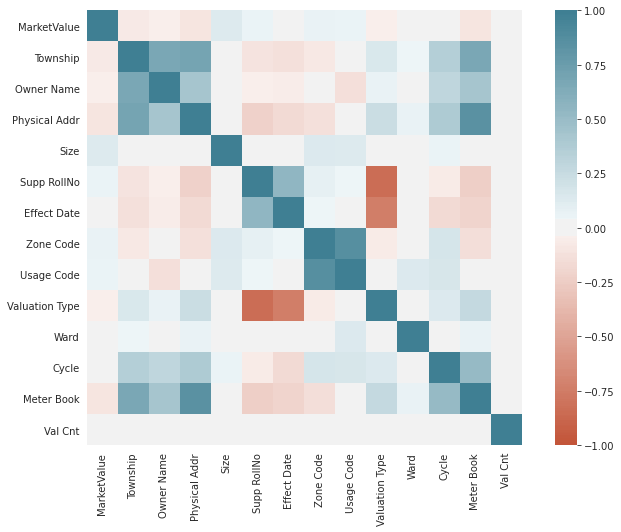

In [52]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, ax=ax)


#### Scatter plots

Jitter encoded varaibles for better data visualization

In [53]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

In [54]:
df_copy2['Physical Addr'] = Jitter(df_copy2['Physical Addr'])
df_copy2['Valuation Type'] = Jitter(df_copy2['Valuation Type'])
df_copy2['Usage Code'] = Jitter(df_copy2['Usage Code'])
df_copy2['Township'] = Jitter(df_copy2['Township'])
df_copy2['Owner Name'] = Jitter(df_copy2['Owner Name'])
df_copy2['Effect Date'] = Jitter(df_copy2['Effect Date'])
df_copy2['Meter Book'] = Jitter(df_copy2['Meter Book'])

<Figure size 86400x86400 with 0 Axes>

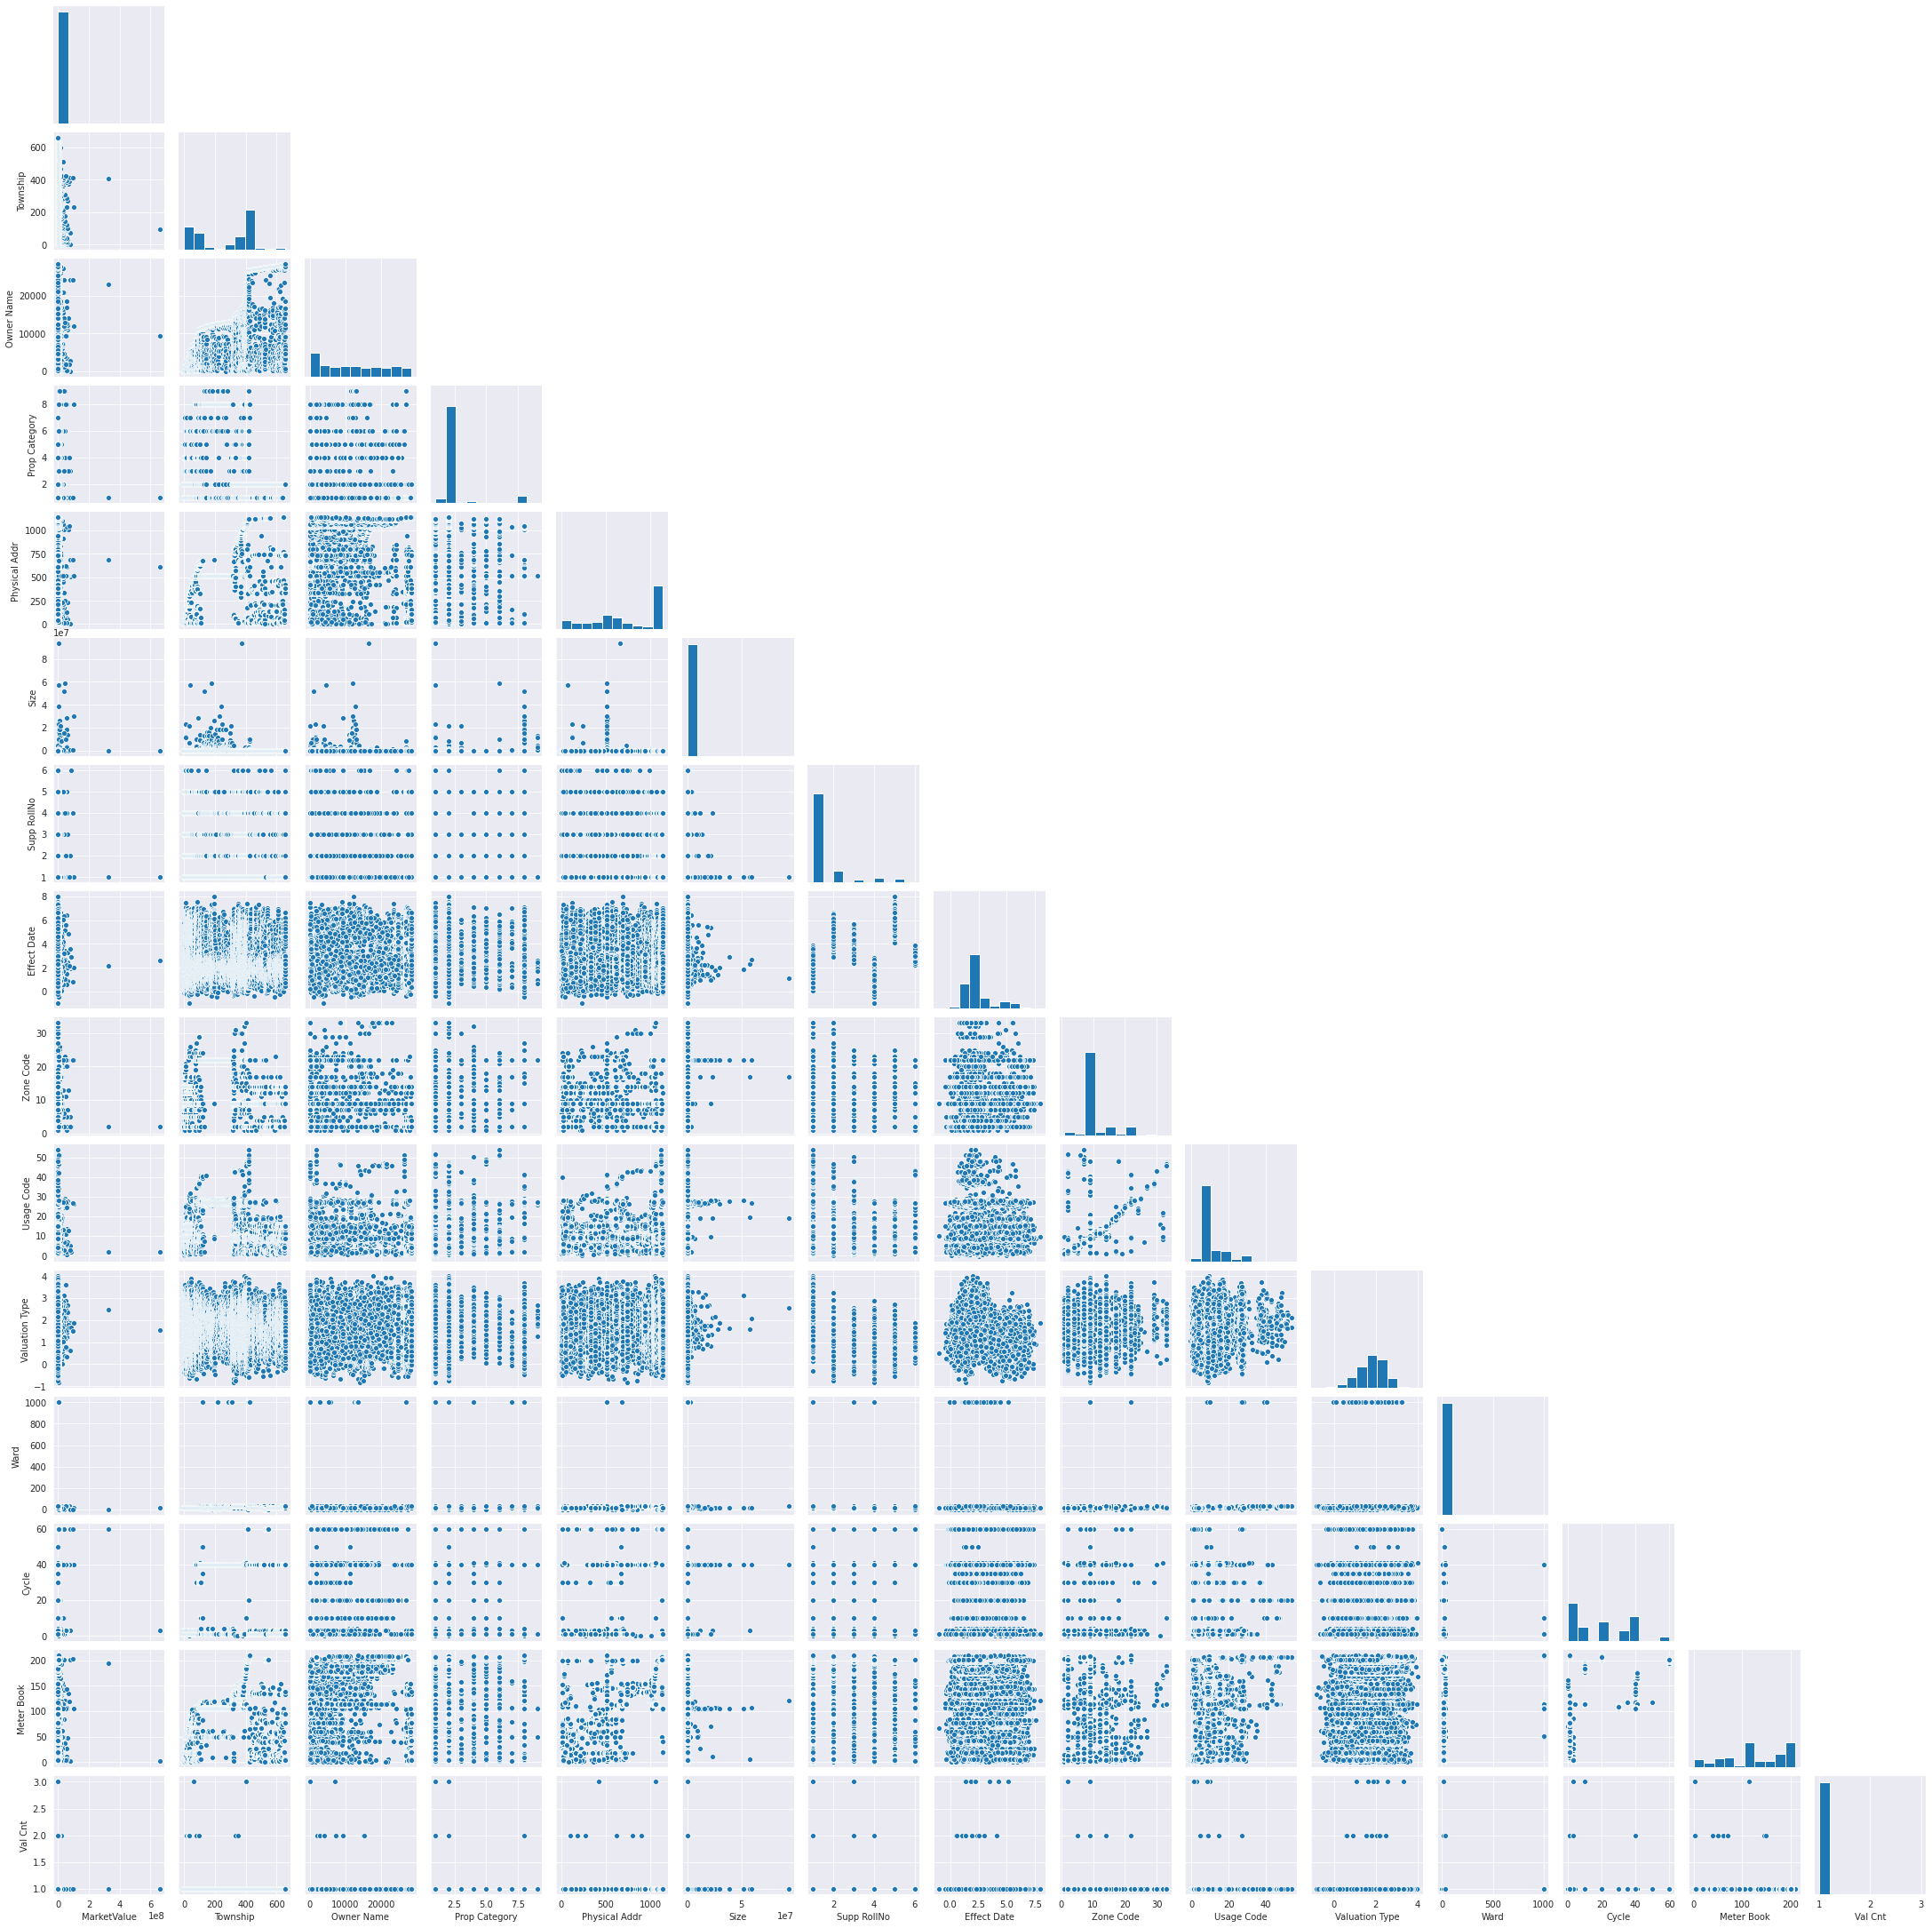

In [55]:
plt.figure(figsize=(1200, 1200))
mat_plot = sns.pairplot(df_copy2,diag_kind="hist",palette='Dark2',corner=True, height = 2)
plt.show()

In [56]:
print(df_copy2.columns)
df_copy2['Prop Category'] = df_copy2['Prop Category'].astype(int)
df_copy2.dtypes

Index(['MarketValue', 'Township', 'Owner Name', 'Prop Category',
       'Physical Addr', 'Size', 'Supp RollNo', 'Effect Date', 'Zone Code',
       'Usage Code', 'Valuation Type', 'Ward', 'Cycle', 'Meter Book',
       'Val Cnt'],
      dtype='object')


MarketValue       float64
Township          float64
Owner Name        float64
Prop Category       int64
Physical Addr     float64
Size              float64
Supp RollNo       float64
Effect Date       float64
Zone Code           int64
Usage Code        float64
Valuation Type    float64
Ward              float64
Cycle             float64
Meter Book        float64
Val Cnt           float64
dtype: object

From the correlation plots it is clear to see that our predictive variable(Market Value) has very little to non correlation with our deterministic variables. The variable that has the highest correlation with marketvalue is size.

In [57]:
# model 1

X = df_copy2['Size']

y = df_copy2["MarketValue"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.018
Model:                            OLS   Adj. R-squared (uncentered):              0.018
Method:                 Least Squares   F-statistic:                              790.3
Date:                Fri, 28 May 2021   Prob (F-statistic):                   2.49e-172
Time:                        12:29:28   Log-Likelihood:                     -7.2414e+05
No. Observations:               43390   AIC:                                  1.448e+06
Df Residuals:                   43389   BIC:                                  1.448e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Size           0.6725      0.024     28.112      0.000       0.626       0.719
==============================================================================
Omnibus:                   173586.403   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     393076491474.607
Skew:                         102.171   Prob(JB):                         0.00
Kurtosis:                   14746.739   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# model 2

X = df_copy2[['Size', 'Usage Code']]



model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.050
Model:                            OLS   Adj. R-squared (uncentered):              0.050
Method:                 Least Squares   F-statistic:                              1145.
Date:                Fri, 28 May 2021   Prob (F-statistic):                        0.00
Time:                        12:29:37   Log-Likelihood:                     -7.2341e+05
No. Observations:               43390   AIC:                                  1.447e+06
Df Residuals:                   43388   BIC:                                  1.447e+06
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Size           0.5749      0.024     24.295      0.000       0.528       0.621
Usage Code    5.9e+04   1537.069     38.385      0.000     5.6e+04     6.2e+04
==============================================================================
Omnibus:                   173752.002   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     395772098713.631
Skew:                         102.483   Prob(JB):                         0.00
Kurtosis:                   14797.208   Cond. No.                     6.53e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
# model 3

X = df_copy2[['Prop Category', 'Usage Code']]



model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.039
Model:                            OLS   Adj. R-squared (uncentered):              0.039
Method:                 Least Squares   F-statistic:                              891.0
Date:                Fri, 28 May 2021   Prob (F-statistic):                        0.00
Time:                        12:30:00   Log-Likelihood:                     -7.2365e+05
No. Observations:               43390   AIC:                                  1.447e+06
Df Residuals:                   43388   BIC:                                  1.447e+06
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Prop Category  1.728e+05   1.72e+04     10.034      0.000    1.39e+05    2.07e+05
Usage Code     2.874e+04   3745.783      7.672      0.000    2.14e+04    3.61e+04
==============================================================================
Omnibus:                   173008.634   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     378288124237.047
Skew:                         101.098   Prob(JB):                         0.00
Kurtosis:                   14466.710   Cond. No.                         11.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
print(df_copy2.columns)
print(df_copy2.dtypes)

Index(['MarketValue', 'Township', 'Owner Name', 'Prop Category',
       'Physical Addr', 'Size', 'Supp RollNo', 'Effect Date', 'Zone Code',
       'Usage Code', 'Valuation Type', 'Ward', 'Cycle', 'Meter Book',
       'Val Cnt'],
      dtype='object')
MarketValue       float64
Township          float64
Owner Name        float64
Prop Category       int64
Physical Addr     float64
Size              float64
Supp RollNo       float64
Effect Date       float64
Zone Code           int64
Usage Code        float64
Valuation Type    float64
Ward              float64
Cycle             float64
Meter Book        float64
Val Cnt           float64
dtype: object


In [61]:
# model 4

X = df_copy2[list(df_copy2.columns)[1:]]



model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.067
Model:                            OLS   Adj. R-squared (uncentered):              0.067
Method:                 Least Squares   F-statistic:                              224.1
Date:                Fri, 28 May 2021   Prob (F-statistic):                        0.00
Time:                        12:30:04   Log-Likelihood:                     -7.2301e+05
No. Observations:               43390   AIC:                                  1.446e+06
Df Residuals:                   43376   BIC:                                  1.446e+06
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Township        -189.6725    207.991     -0.912      0.362    -597.339     217.994
Owner Name         8.9089      3.640      2.447      0.014       1.774      16.044
Prop Category   4.481e+04   1.92e+04      2.334      0.020    7180.392    8.24e+04
Physical Addr   -221.7432    109.309     -2.029      0.043    -435.991      -7.495
Size               0.5675      0.024     23.977      0.000       0.521       0.614
Supp RollNo     1.788e+05   2.57e+04      6.966      0.000    1.28e+05    2.29e+05
Effect Date    -1.018e+05   1.85e+04     -5.491      0.000   -1.38e+05   -6.55e+04
Zone Code      -3.936e+04    1.2e+04     -3.293      0.001   -6.28e+04   -1.59e+04
Usage Code       4.08e+04   8137.855      5.013      0.000    2.48e+04    5.67e+04
Valuation Type -1.109e+04   3.74e+04     -0.296      0.767   -8.45e+04    6.23e+04
Ward            -750.2291    474.076     -1.583      0.114   -1679.428     178.969
Cycle           1.254e+04   1467.204      8.550      0.000    9668.933    1.54e+04
Meter Book     -8171.4207    703.477    -11.616      0.000   -9550.249   -6792.592
Val Cnt         1.533e+06   1.27e+05     12.072      0.000    1.28e+06    1.78e+06
==============================================================================
Omnibus:                   174885.807   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     418966582137.704
Skew:                         104.636   Prob(JB):                         0.00
Kurtosis:                   15224.570   Cond. No.                     5.59e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
df_independent_var = df_copy2[list(df_copy2.columns)[1:]]
df_independent_var.head()

,Township,Owner Name,Prop Category,Physical Addr,Size,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
0,1.542930,0.648482,1,1.256625,862.0,4.0,0.914304,1,1.155142,0.321103,14.0,3.0,1.443957,1.0
1,1.975583,2.179869,1,1.929161,625.0,1.0,2.322501,1,1.235549,1.969555,14.0,3.0,1.878706,1.0
2,1.017521,2.537668,1,3.559551,1487.0,4.0,0.970207,1,0.815213,0.568992,14.0,3.0,0.612254,1.0
3,1.039235,3.468012,1,2.894582,1487.0,4.0,1.699405,1,1.067227,0.814026,14.0,3.0,1.850394,1.0
4,0.572884,5.308048,1,1.534389,1487.0,6.0,3.420119,1,1.897975,0.973816,14.0,3.0,2.168871,1.0


In [74]:
#since p-value for township and valuation type and ward can't be rejected with regards to the null hypothersis that (beta = 0 with a and error term = 0.05) we will remove these variables and see how the model improves
#First remove valuation type since it has the highest p-value
df_independent_var = df_independent_var.drop(columns = 'Valuation Type')


In [75]:
df_independent_var.head()


,Township,Owner Name,Prop Category,Physical Addr,Size,Supp RollNo,Effect Date,Zone Code,Usage Code,Ward,Cycle,Meter Book,Val Cnt
0,1.542930,0.648482,1,1.256625,862.0,4.0,0.914304,1,1.155142,14.0,3.0,1.443957,1.0
1,1.975583,2.179869,1,1.929161,625.0,1.0,2.322501,1,1.235549,14.0,3.0,1.878706,1.0
2,1.017521,2.537668,1,3.559551,1487.0,4.0,0.970207,1,0.815213,14.0,3.0,0.612254,1.0
3,1.039235,3.468012,1,2.894582,1487.0,4.0,1.699405,1,1.067227,14.0,3.0,1.850394,1.0
4,0.572884,5.308048,1,1.534389,1487.0,6.0,3.420119,1,1.897975,14.0,3.0,2.168871,1.0


In [76]:
# model 5

X = df_independent_var[list(df_independent_var.columns)]



model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.067
Model:                            OLS   Adj. R-squared (uncentered):              0.067
Method:                 Least Squares   F-statistic:                              241.3
Date:                Fri, 28 May 2021   Prob (F-statistic):                        0.00
Time:                        12:45:52   Log-Likelihood:                     -7.2301e+05
No. Observations:               43390   AIC:                                  1.446e+06
Df Residuals:                   43377   BIC:                                  1.446e+06
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Township       -190.1469    207.983     -0.914      0.361    -597.797     217.503
Owner Name        8.9089      3.640      2.447      0.014       1.774      16.044
Prop Category  4.489e+04   1.92e+04      2.338      0.019    7257.930    8.25e+04
Physical Addr  -221.5943    109.307     -2.027      0.043    -435.838      -7.351
Size              0.5675      0.024     23.976      0.000       0.521       0.614
Supp RollNo    1.817e+05   2.37e+04      7.670      0.000    1.35e+05    2.28e+05
Effect Date   -1.007e+05   1.81e+04     -5.558      0.000   -1.36e+05   -6.52e+04
Zone Code     -3.938e+04    1.2e+04     -3.294      0.001   -6.28e+04    -1.6e+04
Usage Code     4.078e+04   8137.569      5.011      0.000    2.48e+04    5.67e+04
Ward           -750.1477    474.071     -1.582      0.114   -1679.336     179.041
Cycle          1.254e+04   1466.912      8.546      0.000    9661.067    1.54e+04
Meter Book    -8175.7297    703.319    -11.624      0.000   -9554.249   -6797.211
Val Cnt        1.507e+06   9.16e+04     16.439      0.000    1.33e+06    1.69e+06
==============================================================================
Omnibus:                   174885.968   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     418974062132.960
Skew:                         104.636   Prob(JB):                         0.00
Kurtosis:                   15224.706   Cond. No.                     3.95e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.95e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
#Note that R-squared is still 0.067 remaing the same but the p-value of Township has slightly decreased to 0.361 from 0.362
#next we remove the twonship variable
df_independent_var = df_independent_var.drop(columns = 'Township')

In [78]:
# model 6

X = df_independent_var[list(df_independent_var.columns)]



model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.067
Model:                            OLS   Adj. R-squared (uncentered):              0.067
Method:                 Least Squares   F-statistic:                              261.3
Date:                Fri, 28 May 2021   Prob (F-statistic):                        0.00
Time:                        12:50:24   Log-Likelihood:                     -7.2301e+05
No. Observations:               43390   AIC:                                  1.446e+06
Df Residuals:                   43378   BIC:                                  1.446e+06
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Owner Name        6.8520      2.862      2.394      0.017       1.243      12.461
Prop Category  4.572e+04   1.92e+04      2.384      0.017    8133.694    8.33e+04
Physical Addr  -249.1077    105.082     -2.371      0.018    -455.071     -43.144
Size              0.5675      0.024     23.979      0.000       0.521       0.614
Supp RollNo    1.808e+05   2.37e+04      7.638      0.000    1.34e+05    2.27e+05
Effect Date   -1.001e+05   1.81e+04     -5.529      0.000   -1.36e+05   -6.46e+04
Zone Code     -3.662e+04   1.16e+04     -3.166      0.002   -5.93e+04    -1.4e+04
Usage Code     3.852e+04   7754.390      4.968      0.000    2.33e+04    5.37e+04
Ward           -732.5884    473.681     -1.547      0.122   -1661.012     195.835
Cycle           1.25e+04   1466.350      8.524      0.000    9625.153    1.54e+04
Meter Book    -8243.2008    699.435    -11.786      0.000   -9614.107   -6872.294
Val Cnt        1.504e+06   9.16e+04     16.419      0.000    1.32e+06    1.68e+06
==============================================================================
Omnibus:                   174888.524   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     419029493982.532
Skew:                         104.641   Prob(JB):                         0.00
Kurtosis:                   15225.713   Cond. No.                     3.95e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.95e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
#R-squared remains at 0.067 and the variable ward p-value has increased to 0.122 from 0.114
#we remove Ward
df_independent_var = df_independent_var.drop(columns = 'Ward')

In [80]:
# model 7

X = df_independent_var[list(df_independent_var.columns)]



model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.067
Model:                            OLS   Adj. R-squared (uncentered):              0.067
Method:                 Least Squares   F-statistic:                              284.9
Date:                Fri, 28 May 2021   Prob (F-statistic):                        0.00
Time:                        12:52:32   Log-Likelihood:                     -7.2301e+05
No. Observations:               43390   AIC:                                  1.446e+06
Df Residuals:                   43379   BIC:                                  1.446e+06
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Owner Name        6.6607      2.859      2.330      0.020       1.057      12.265
Prop Category  4.601e+04   1.92e+04      2.399      0.016    8418.598    8.36e+04
Physical Addr  -251.4842    105.073     -2.393      0.017    -457.429     -45.539
Size              0.5679      0.024     23.995      0.000       0.522       0.614
Supp RollNo    1.807e+05   2.37e+04      7.637      0.000    1.34e+05    2.27e+05
Effect Date   -9.992e+04   1.81e+04     -5.520      0.000   -1.35e+05   -6.44e+04
Zone Code     -3.351e+04   1.14e+04     -2.942      0.003   -5.58e+04   -1.12e+04
Usage Code     3.583e+04   7555.595      4.742      0.000     2.1e+04    5.06e+04
Cycle          1.252e+04   1466.305      8.539      0.000    9647.234    1.54e+04
Meter Book    -8224.2892    699.340    -11.760      0.000   -9595.008   -6853.570
Val Cnt        1.487e+06    9.1e+04     16.351      0.000    1.31e+06    1.67e+06
==============================================================================
Omnibus:                   174886.259   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     418970999882.416
Skew:                         104.636   Prob(JB):                         0.00
Kurtosis:                   15224.650   Cond. No.                     3.92e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df_independent_var_dummy = df_independent_var
sample_size = len(df_independent_var_dummy)

In [101]:
def calculate_vif_(X, thresh=10):
    """Calculation of VIFs to reduce multicollinearity problems.

    Parameters:
    -----------
    X : pandas DataFrame with all possible predictors and
    without the response variable

    thresh: integer, threshold by which to exclude variables
    for dataset

    Returns:
    --------
    remaining: list of variable names that still remain in 
               the dataset

    """
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [outliers_influence.variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

#     print('Remaining variables:')
#     print(X.columns[variables])
    remaining=cols[variables]
    return remaining

In [102]:
def remove_inflated_variables(data,sample_size,print_out=True):
    """Calculation of VIFs to reduce multicollinearity problems
    using a subset of the data

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and
    the response variable

    sample_size: integer, size of the sample used to estimate the
    VIFs
    
    print_out : whether to print the sequence of exclusions

    Returns:
    --------
    remaining: list of variable names that still remain in 
               the dataset

    """
    #sample_train=resample(data,n_samples=sample_size)
    #sample_dummy_mod = sample_train.drop(['Salary','Year'], axis = 1)
    remaining=calculate_vif_(data)
    return remaining

In [103]:
remaining=remove_inflated_variables(df_independent_var_dummy,sample_size)

dropping 'Zone Code' at index: 6
dropping 'Meter Book' at index: 8
dropping 'Val Cnt' at index: 8


In [107]:
remaining

Index(['Owner Name', 'Prop Category', 'Physical Addr', 'Size', 'Supp RollNo',
       'Effect Date', 'Usage Code', 'Cycle'],
      dtype='object')

In [108]:
# model 8

X = df_independent_var[list(remaining)]



model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.060
Model:                            OLS   Adj. R-squared (uncentered):              0.060
Method:                 Least Squares   F-statistic:                              345.4
Date:                Fri, 28 May 2021   Prob (F-statistic):                        0.00
Time:                        13:30:59   Log-Likelihood:                     -7.2319e+05
No. Observations:               43390   AIC:                                  1.446e+06
Df Residuals:                   43382   BIC:                                  1.446e+06
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Owner Name        7.4084      2.646      2.800      0.005       2.223      12.594
Prop Category  9.352e+04   1.81e+04      5.170      0.000    5.81e+04    1.29e+05
Physical Addr  -716.1083     60.447    -11.847      0.000    -834.587    -597.630
Size              0.5559      0.024     23.421      0.000       0.509       0.602
Supp RollNo    2.731e+05   2.32e+04     11.786      0.000    2.28e+05    3.19e+05
Effect Date    1.062e+04   1.66e+04      0.640      0.522   -2.19e+04    4.31e+04
Usage Code     3.337e+04   4480.249      7.448      0.000    2.46e+04    4.21e+04
Cycle          5122.1446   1342.747      3.815      0.000    2490.336    7753.953
==============================================================================
Omnibus:                   174544.255   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     411983814658.986
Skew:                         103.983   Prob(JB):                         0.00
Kurtosis:                   15097.185   Cond. No.                     1.12e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
Dummy_var = df_independent_var[list(remaining)]
Dummy_var = Dummy_var.drop(columns = 'Effect Date')

In [111]:
# model 9

X = Dummy_var[list(Dummy_var.columns)]



model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.060
Model:                            OLS   Adj. R-squared (uncentered):              0.060
Method:                 Least Squares   F-statistic:                              394.7
Date:                Fri, 28 May 2021   Prob (F-statistic):                        0.00
Time:                        13:34:56   Log-Likelihood:                     -7.2319e+05
No. Observations:               43390   AIC:                                  1.446e+06
Df Residuals:                   43383   BIC:                                  1.446e+06
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Owner Name        7.5862      2.631      2.883      0.004       2.429      12.743
Prop Category   9.38e+04   1.81e+04      5.188      0.000    5.84e+04    1.29e+05
Physical Addr  -708.5350     59.278    -11.953      0.000    -824.720    -592.350
Size              0.5556      0.024     23.413      0.000       0.509       0.602
Supp RollNo    2.825e+05   1.79e+04     15.749      0.000    2.47e+05    3.18e+05
Usage Code     3.379e+04   4431.278      7.626      0.000    2.51e+04    4.25e+04
Cycle          5019.7055   1333.165      3.765      0.000    2406.678    7632.733
==============================================================================
Omnibus:                   174546.702   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     412037235490.874
Skew:                         103.988   Prob(JB):                         0.00
Kurtosis:                   15098.163   Cond. No.                     7.86e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.001, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Parameters:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [117]:
X = df_independent_var
y = df_copy2['MarketValue']
result = stepwise_selection(X, y)

<ipython-input-115-8e1d993f71d8>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Size                           with p-value 3.41593e-152
Add  Meter Book                     with p-value 1.84314e-108


<ipython-input-115-8e1d993f71d8>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-115-8e1d993f71d8>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Cycle                          with p-value 5.63877e-32
Add  Usage Code                     with p-value 2.53656e-11


<ipython-input-115-8e1d993f71d8>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-115-8e1d993f71d8>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Supp RollNo                    with p-value 1.64725e-08


<ipython-input-115-8e1d993f71d8>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Effect Date                    with p-value 2.5697e-09


<ipython-input-115-8e1d993f71d8>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


In [118]:
result

['Size', 'Meter Book', 'Cycle', 'Usage Code', 'Supp RollNo', 'Effect Date']

In [119]:
# model 9

X = df_independent_var[list(result)]



model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.060
Model:                            OLS   Adj. R-squared (uncentered):              0.060
Method:                 Least Squares   F-statistic:                              461.4
Date:                Fri, 28 May 2021   Prob (F-statistic):                        0.00
Time:                        13:43:40   Log-Likelihood:                     -7.2319e+05
No. Observations:               43390   AIC:                                  1.446e+06
Df Residuals:                   43384   BIC:                                  1.446e+06
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Size            0.5626      0.024     23.771      0.000       0.516       0.609
Meter Book  -4721.8255    317.191    -14.886      0.000   -5343.525   -4100.126
Cycle        1.155e+04   1385.324      8.338      0.000    8836.172    1.43e+04
Usage Code   5.121e+04   2971.212     17.237      0.000    4.54e+04     5.7e+04
Supp RollNo  2.797e+05   2.31e+04     12.127      0.000    2.34e+05    3.25e+05
Effect Date   2.79e+04   1.65e+04      1.693      0.090   -4394.125    6.02e+04
==============================================================================
Omnibus:                   174485.350   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     410786075231.778
Skew:                         103.871   Prob(JB):                         0.00
Kurtosis:                   15075.226   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
Dummy_var2 = df_independent_var[list(result)]
Dummy_var2 = Dummy_var2.drop(columns = 'Meter Book')

In [121]:
# model 10

X = Dummy_var2[list(Dummy_var2.columns)]



model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.055
Model:                            OLS   Adj. R-squared (uncentered):              0.055
Method:                 Least Squares   F-statistic:                              506.8
Date:                Fri, 28 May 2021   Prob (F-statistic):                        0.00
Time:                        13:46:52   Log-Likelihood:                     -7.2330e+05
No. Observations:               43390   AIC:                                  1.447e+06
Df Residuals:                   43385   BIC:                                  1.447e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Size            0.5902      0.024     24.952      0.000       0.544       0.637
Cycle        -679.5654   1118.205     -0.608      0.543   -2871.269    1512.138
Usage Code    3.79e+04   2840.646     13.343      0.000    3.23e+04    4.35e+04
Supp RollNo  3.011e+05   2.31e+04     13.050      0.000    2.56e+05    3.46e+05
Effect Date -4.459e+04   1.58e+04     -2.825      0.005   -7.55e+04   -1.37e+04
==============================================================================
Omnibus:                   174111.935   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     403081580014.691
Skew:                         103.162   Prob(JB):                         0.00
Kurtosis:                   14933.206   Cond. No.                     1.10e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
Dummy_var2 = Dummy_var2.drop(columns = 'Cycle')

In [123]:
# model 11

X = Dummy_var2[list(Dummy_var2.columns)]



model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.055
Model:                            OLS   Adj. R-squared (uncentered):              0.055
Method:                 Least Squares   F-statistic:                              633.4
Date:                Fri, 28 May 2021   Prob (F-statistic):                        0.00
Time:                        13:47:59   Log-Likelihood:                     -7.2330e+05
No. Observations:               43390   AIC:                                  1.447e+06
Df Residuals:                   43386   BIC:                                  1.447e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Size            0.5901      0.024     24.948      0.000       0.544       0.636
Usage Code   3.711e+04   2525.562     14.694      0.000    3.22e+04    4.21e+04
Supp RollNo  3.004e+05    2.3e+04     13.036      0.000    2.55e+05    3.46e+05
Effect Date -4.516e+04   1.58e+04     -2.867      0.004    -7.6e+04   -1.43e+04
==============================================================================
Omnibus:                   174109.451   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     403050976144.016
Skew:                         103.158   Prob(JB):                         0.00
Kurtosis:                   14932.639   Cond. No.                     1.10e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
df_var_dummy = df_copy2[list(df_copy2.columns)[1:]]

In [125]:
X = df_var_dummy
y = df_copy2['MarketValue']
result = stepwise_selection(X, y)

<ipython-input-115-8e1d993f71d8>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-115-8e1d993f71d8>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Size                           with p-value 3.41593e-152
Add  Meter Book                     with p-value 1.84314e-108


<ipython-input-115-8e1d993f71d8>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Cycle                          with p-value 5.63877e-32


<ipython-input-115-8e1d993f71d8>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Usage Code                     with p-value 2.53656e-11


<ipython-input-115-8e1d993f71d8>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Supp RollNo                    with p-value 1.64725e-08


<ipython-input-115-8e1d993f71d8>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Effect Date                    with p-value 2.5697e-09


<ipython-input-115-8e1d993f71d8>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


In [126]:
result

['Size', 'Meter Book', 'Cycle', 'Usage Code', 'Supp RollNo', 'Effect Date']

In [127]:
# model 9

X = df_var_dummy[list(result)]



model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.060
Model:                            OLS   Adj. R-squared (uncentered):              0.060
Method:                 Least Squares   F-statistic:                              461.4
Date:                Fri, 28 May 2021   Prob (F-statistic):                        0.00
Time:                        13:59:42   Log-Likelihood:                     -7.2319e+05
No. Observations:               43390   AIC:                                  1.446e+06
Df Residuals:                   43384   BIC:                                  1.446e+06
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Size            0.5626      0.024     23.771      0.000       0.516       0.609
Meter Book  -4721.8255    317.191    -14.886      0.000   -5343.525   -4100.126
Cycle        1.155e+04   1385.324      8.338      0.000    8836.172    1.43e+04
Usage Code   5.121e+04   2971.212     17.237      0.000    4.54e+04     5.7e+04
Supp RollNo  2.797e+05   2.31e+04     12.127      0.000    2.34e+05    3.25e+05
Effect Date   2.79e+04   1.65e+04      1.693      0.090   -4394.125    6.02e+04
==============================================================================
Omnibus:                   174485.350   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     410786075231.778
Skew:                         103.871   Prob(JB):                         0.00
Kurtosis:                   15075.226   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
var = df_var_dummy[list(result)]
var = var.drop(columns = 'Effect Date')

In [129]:
# model 9

X = var[list(var.columns)]



model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.060
Model:                            OLS   Adj. R-squared (uncentered):              0.060
Method:                 Least Squares   F-statistic:                              553.1
Date:                Fri, 28 May 2021   Prob (F-statistic):                        0.00
Time:                        14:01:48   Log-Likelihood:                     -7.2319e+05
No. Observations:               43390   AIC:                                  1.446e+06
Df Residuals:                   43385   BIC:                                  1.446e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Size            0.5619      0.024     23.744      0.000       0.515       0.608
Meter Book  -4563.0929    303.029    -15.058      0.000   -5157.036   -3969.150
Cycle        1.125e+04   1373.748      8.188      0.000    8555.855    1.39e+04
Usage Code   5.241e+04   2885.499     18.164      0.000    4.68e+04    5.81e+04
Supp RollNo   3.05e+05   1.75e+04     17.388      0.000    2.71e+05    3.39e+05
==============================================================================
Omnibus:                   174492.493   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     410947435243.613
Skew:                         103.884   Prob(JB):                         0.00
Kurtosis:                   15078.186   Cond. No.                     7.52e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
# model 9

X = df_copy2['Size']



model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.018
Model:                            OLS   Adj. R-squared (uncentered):              0.018
Method:                 Least Squares   F-statistic:                              790.3
Date:                Fri, 28 May 2021   Prob (F-statistic):                   2.49e-172
Time:                        16:11:27   Log-Likelihood:                     -7.2414e+05
No. Observations:               43390   AIC:                                  1.448e+06
Df Residuals:                   43389   BIC:                                  1.448e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Size           0.6725      0.024     28.112      0.000       0.626       0.719
==============================================================================
Omnibus:                   173586.403   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     393076491474.607
Skew:                         102.171   Prob(JB):                         0.00
Kurtosis:                   14746.739   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""